C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:15:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       183
         1.0       0.00      0.00      0.00        17

    accuracy                           0.90       200
   macro avg       0.46      0.49      0.47       200
weighted avg       0.84      0.90      0.87       200

✅ Model saved as SecurityDatasetXgBoost.json


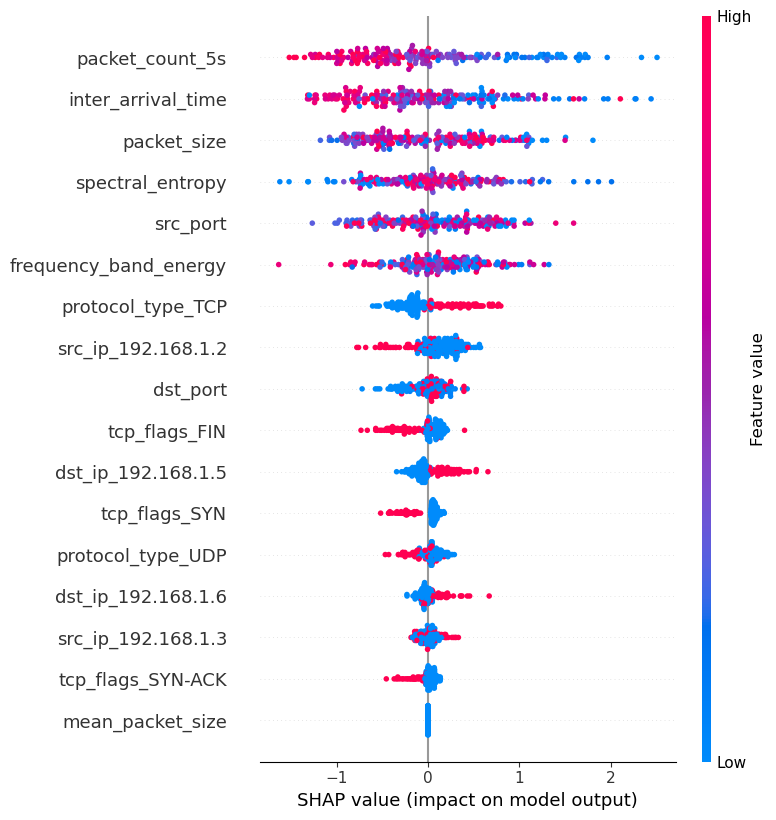

In [1]:
# train_save_xgb.py
import pandas as pd
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("security.csv")

# Convert categorical columns to int
categorical_columns = ['protocol_type_TCP', 'protocol_type_UDP',
                       'tcp_flags_FIN', 'tcp_flags_SYN', 'tcp_flags_SYN-ACK']
df[categorical_columns] = df[categorical_columns].astype(int)

# Features & target
X = df.drop('label', axis=1)
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure boolean columns are int
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

# Train XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model in JSON format (robust to NumPy version)
model.save_model('SecurityDatasetXgBoost.json')
print("✅ Model saved as SecurityDatasetXgBoost.json")

# Optional: create SHAP explainer (not saving)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


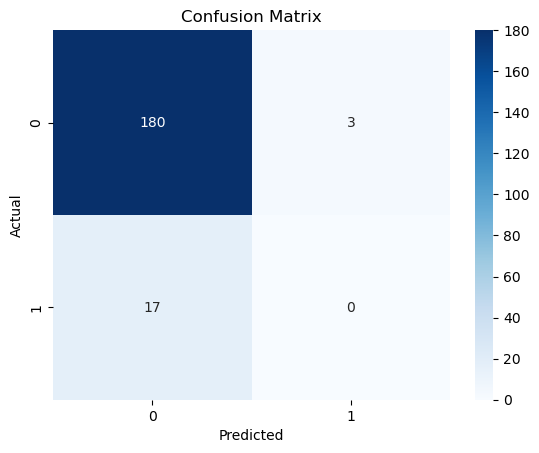

In [2]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

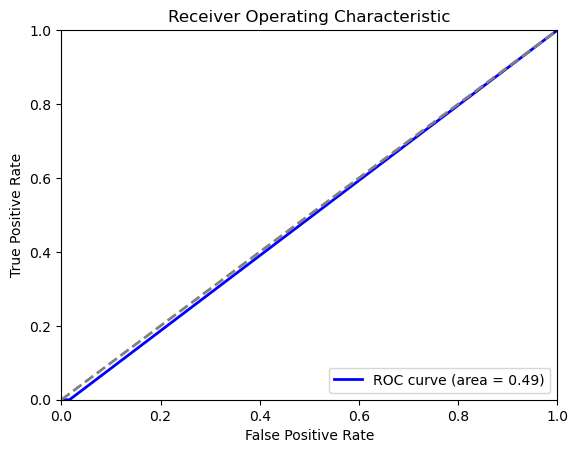

In [3]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

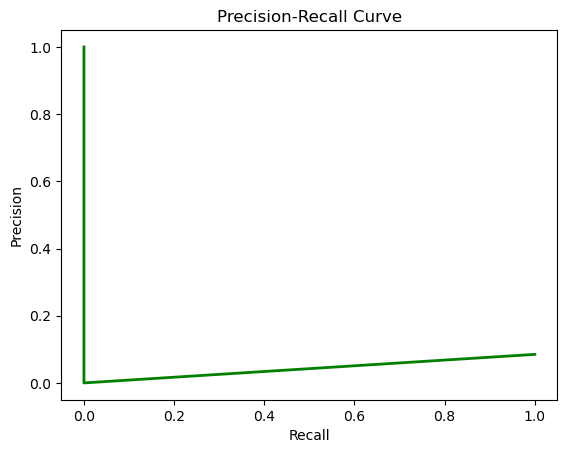

In [5]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

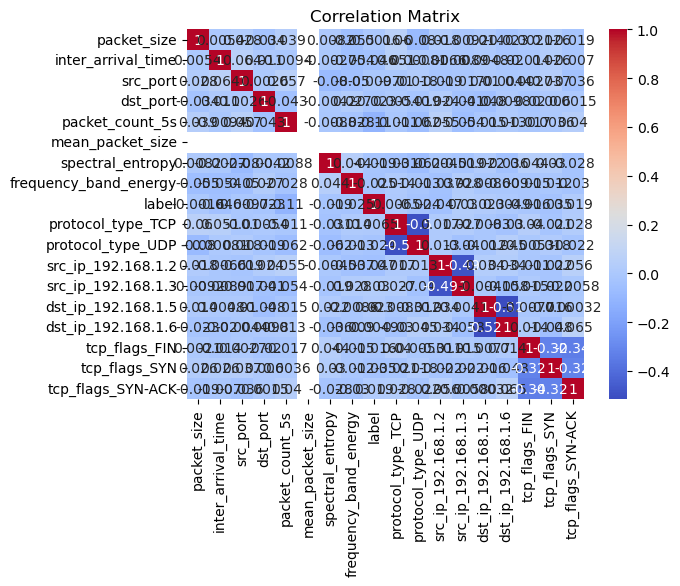

In [6]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
import joblib
joblib.dump(model, 'SecurityDatasetXgBoost.pkl')

['SecurityDatasetXgBoost.pkl']